# Lab 2 - Formação da imagem

Neste laboratório, vamos testar os conceitos aprendidos em aula sobre projeção e formação da imagem. Apesar dos exemplos utilizarem o plotly na maioria das vezes, sinta-se a vontade para usar o Matplotlib quando desejar. Além disso, vamos conhecer uma outra biblioteca chamada interact, que nos ajuda a alterar nossos plots de forma dinâmica!

##Exemplos de utilização do interact

In [1]:
import numpy as np
import plotly.graph_objects as go            # Plotly
from plotly.subplots import make_subplots    # Subplots no Plotly
from ipywidgets import interact, interactive # Mudar parâmetros em sliders e alterar o gráfico de forma interativa
from math import pi,cos,sin                  # Funções e variáveis matemáticas
import trimesh
import nbformat

###Funções genéricas de translação e rotação

In [2]:
def translacao(dx):
  T = np.eye(len(dx)+1)
  for i, d in enumerate(dx):
    T[i,-1] = d
  return T

def rotacao(angulo,dim='2d'):
  anguloD = angulo*pi/180
  if dim == '2d':
    R = np.array([[cos(anguloD),-sin(anguloD),0],[sin(anguloD),cos(anguloD),0],[0,0,1]])
  elif dim == 'x':
    R = np.array([[1,0,0,0],[0,cos(anguloD),-sin(anguloD),0],[0,sin(anguloD),cos(anguloD),0],[0,0,0,1]])
  elif dim == 'y':
    R = np.array([[cos(anguloD),0,sin(anguloD),0],[0,1,0,0],[-sin(anguloD),0,cos(anguloD),0],[0,0,0,1]])
  else:
    R = np.array([[cos(anguloD),-sin(anguloD),0,0],[sin(anguloD),cos(anguloD),0,0],[0,0,1,0],[0,0,0,1]])
  return R

###Exemplo com uma variável

In [3]:
def func(x):
 return 2*x+4

interact(func, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.func(x)>

###Exemplo com múltiplas variáveis

In [4]:
def multi_func(x,y):
  return 2*x+3*y+4

interact(multi_func, x=10, y=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), IntSlider(value=10, description='…

<function __main__.multi_func(x, y)>

###Exemplo com um gráfico

In [5]:
def graph_func(x,y,z):
  T = translacao(np.array([x,y,z]))
  objeto = np.array([3*np.ones(17),[2,4,6,4,6,8,15,18,18,9.5,12,9.5,7.5,5,5,2,2],[5,5,7,10,12,9,17,17,14,7,4.5,3,5.5,4,2,2,5]])
  objeto_h = np.vstack([objeto,np.ones(objeto.shape[1])])
  pontos = T@objeto_h

  trace_obj = go.Scatter3d(x=pontos[0,:],
                           y=pontos[1,:],
                           z=pontos[2,:],
                           mode='lines',
                           line=dict(color='orange',width=5),
                           name='Objeto')

  fig = go.Figure(data=[trace_obj])

  fig.update_layout(scene = dict(
                    xaxis=dict(range=[-4,20]),
                    yaxis=dict(range=[-4,20]),
                    zaxis=dict(range=[-4,20]),
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z',
                    aspectmode='cube'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

  fig.show()

interact(graph_func, x=(-10,10), y=(-10,10), z=(0,10))

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

<function __main__.graph_func(x, y, z)>

###Exemplo com múltiplos gráficos

In [6]:
def multi_graph_func(x,y,z):
  T = translacao(np.array([x,y,z]))
  objeto = np.array([3*np.ones(17),[2,4,6,4,6,8,15,18,18,9.5,12,9.5,7.5,5,5,2,2],[5,5,7,10,12,9,17,17,14,7,4.5,3,5.5,4,2,2,5]])
  objeto_h = np.vstack([objeto,np.ones(objeto.shape[1])])
  pontos = T@objeto_h

  trace_obj_3d = go.Scatter3d(x=pontos[0,:],
                              y=pontos[1,:],
                              z=pontos[2,:],
                              mode='lines',
                              line=dict(color='orange',width=5),
                              name='Objeto 3D')
  trace_obj_2d = go.Scatter(x=pontos[1,:],
                            y=pontos[2,:],
                            mode='lines',
                            line=dict(color='blue',width=5),
                            name='Objeto 2D')

  fig = make_subplots(rows=1, cols=2,
                      specs=[[{'type': 'scatter3d'}, {'type': 'scatter'}]],
                      subplot_titles=('3D', '2D'))

  fig.add_trace(trace_obj_3d,row=1,col=1)
  fig.add_trace(trace_obj_2d,row=1,col=2)

  fig.update_layout(scene = dict(
                    xaxis=dict(range=[-4,20]),
                    yaxis=dict(range=[-4,20]),
                    zaxis=dict(range=[-4,20]),
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z',
                    aspectmode='cube'),
                    width=1500,
                    margin=dict(r=20, b=10, l=10, t=10))
  fig.update_xaxes(range=[-4,20],row=1,col=2)
  fig.update_yaxes(range=[-4,20],row=1,col=2)


  fig.show()

interact(multi_graph_func, x=(-10,10), y=(-10,10), z=(0,10))

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

<function __main__.multi_graph_func(x, y, z)>

## Vamos adicionar a câmera no plot sendo representada por um eixo de coordenadas

In [7]:
# Com gráficos
def graph_func(x,y,z,xc,yc,zc):
  T = translacao(np.array([x,y,z]))
  objeto = np.array([3*np.ones(17),[2,4,6,4,6,8,15,18,18,9.5,12,9.5,7.5,5,5,2,2],[5,5,7,10,12,9,17,17,14,7,4.5,3,5.5,4,2,2,5]])
  objeto_h = np.vstack([objeto,np.ones(objeto.shape[1])])
  pontos = T@objeto_h

  Tc = translacao(np.array([xc,yc,zc]))
  pontos_cam = np.array([[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,1,1,1]])
  pontos_cam = Tc@pontos_cam

  trace_obj = go.Scatter3d(x=pontos[0,:],
                           y=pontos[1,:],
                           z=pontos[2,:],
                           mode='lines',
                           line=dict(color='orange',width=5),
                           name='Objeto')

  trace_cam_x = go.Scatter3d(x=pontos_cam[0,:2],
                             y=pontos_cam[1,:2],
                             z=pontos_cam[2,:2],
                             mode='lines',
                             line=dict(color='red',width=4))
  trace_cam_y = go.Scatter3d(x=pontos_cam[0,:4:2],
                             y=pontos_cam[1,:4:2],
                             z=pontos_cam[2,:4:2],
                             mode='lines',
                             line=dict(color='green',width=4))
  trace_cam_z = go.Scatter3d(x=pontos_cam[0,:4:3],
                             y=pontos_cam[1,:4:3],
                             z=pontos_cam[2,:4:3],
                             mode='lines',
                             line=dict(color='blue',width=4))

  fig = go.Figure(data=[trace_obj,trace_cam_x,trace_cam_y,trace_cam_z])

  fig.update_layout(scene = dict(
                    xaxis=dict(range=[-4,20]),
                    yaxis=dict(range=[-4,20]),
                    zaxis=dict(range=[-4,20]),
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z',
                    aspectmode='cube'
                    #,camera=dict(eye=dict(x=0,y=2,z=0))
                    ),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

  fig.show()

interact(graph_func, x=(-10,10), y=(-10,10), z=(0,10), xc=(5,25), yc=(-5,15), zc=(-5,15))

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

<function __main__.graph_func(x, y, z, xc, yc, zc)>

## Seu momento de brilhar!

Tente agora criar um objeto, apresentar ele e a câmera num gráfico 3D e a projeção do objeto no plano da imagem num gráfico 2D! Não sei se facilitaria a sua vida, mas você pode condensar os parâmetros e matrizes da câmera em um objeto (em uma classe).

In [8]:
class Camera(object):
  # cam = Camera(cam_pos=np.array([15,5,5]),cam_rot=np.array([-90,0,90]))
  def __init__(self,focal=1,cam_center=np.array([0,0]),cam_pos=np.array([0,0,0]),cam_rot=np.array([0,0,0])):
  # P = K[R|t]
    self.K = np.array([[focal,0,cam_center[0]],[0,focal,cam_center[1]],[0,0,1]])
    self.R = rotacao(cam_rot[2],dim='z')@rotacao(cam_rot[1],dim='y')@rotacao(cam_rot[0],dim='x')
    self.t = translacao(cam_pos)

    # Rt leva do que a camera ve para o mundo. inv(Rt) leva das coordenadas do mundo pras da camera
    self.Rt = np.linalg.inv(self.t@self.R)
    self.P = self.K@np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])@self.Rt

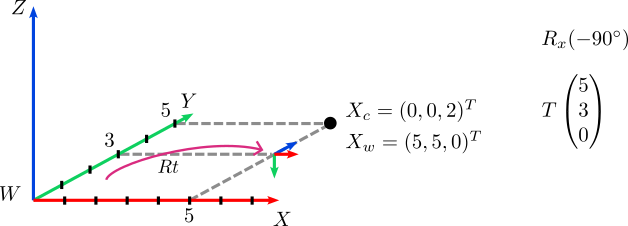

In [9]:
cam = Camera(cam_pos=np.array([5,3,0]),cam_rot=np.array([-90,0,0]),focal=1,cam_center=np.array([319,239]))
X_c = np.array([[0],[0],[2],[1]])
X_w = cam.t@cam.R@X_c
#print(X_w)

X_c = cam.P@X_w

print(X_c)

z_safe = X_c[2, 0] if X_c[2, 0] != 0 else 1e-6  # Evitar divisão por zero
X_c_normalized = X_c / z_safe

print(z_safe, X_c_normalized)

[[638.]
 [478.]
 [  2.]]
2.0 [[319.]
 [239.]
 [  1.]]


In [ ]:
# Carrega o modelo
mesh = trimesh.load_mesh("frog.obj", process=False)
vertices = np.array(mesh.vertices)
faces = np.array(mesh.faces)

# Transforma em homogenea
vertices = vertices.T
vertices = np.vstack([vertices, np.ones((1, vertices.shape[1]))])
vertices_orig = vertices

def graph_func(x,y,z,xc,yc,zc,rx,ry,rz,f):

  cam = Camera(cam_pos=np.array([xc,yc,zc]),cam_rot=np.array([rx,ry,rz]),focal=f,cam_center=np.array([319,239]))

  # Translada o objeto
  T = translacao(np.array([x,y,z]))
  vertices = T@vertices_orig

  # Translada a camera e rotaciona
  pontos_cam = np.array([[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,1,1,1]])
  pontos_cam = cam.t@cam.R@pontos_cam

  pontos_graph = cam.P@vertices

  points = [[], [], []]
  # Retira da imagem z < 0
  for p in range(len(pontos_graph[2])):
    if pontos_graph[2][p] > 0:
      points[0].append(pontos_graph[0][p])
      points[1].append(pontos_graph[1][p])
      points[2].append(pontos_graph[2][p])

  points = np.array(points)
  points = points / points[2, :]

  # Criar a figura no Plotly
  trace_obj = go.Scatter3d(x=vertices[0,:],
                           y=vertices[1,:],
                           z=vertices[2,:],
                           mode='markers',
                           marker=dict(color='black', size=3, symbol='circle'),
                           name='Objeto')

  trace_cam_x = go.Scatter3d(x=pontos_cam[0,:2],
                              y=pontos_cam[1,:2],
                              z=pontos_cam[2,:2],
                              mode='lines',
                              line=dict(color='red',width=4))
  trace_cam_y = go.Scatter3d(x=pontos_cam[0,:4:2],
                              y=pontos_cam[1,:4:2],
                              z=pontos_cam[2,:4:2],
                              mode='lines',
                              line=dict(color='green',width=4))
  trace_cam_z = go.Scatter3d(x=pontos_cam[0,:4:3],
                              y=pontos_cam[1,:4:3],
                              z=pontos_cam[2,:4:3],
                              mode='lines',
                              line=dict(color='blue',width=4))

  trace_obj_2d = go.Scatter(x=points[0,:],
                            y=points[1,:],
                            mode='markers',
                            marker=dict(color='black',size=3,symbol='circle'),
                            name='Objeto 2D')

  fig = make_subplots(rows=1, cols=2,
                      specs=[[{'type': 'scatter3d'}, {'type': 'scatter'}]],
                      subplot_titles=('3D', '2D'))

  fig.add_trace(trace_obj,row=1,col=1)
  fig.add_trace(trace_cam_x,row=1,col=1)
  fig.add_trace(trace_cam_y,row=1,col=1)
  fig.add_trace(trace_cam_z,row=1,col=1)

  fig.add_trace(trace_obj_2d,row=1,col=2)

  fig.update_xaxes(range=[0,639],row=1,col=2)
  fig.update_yaxes(range=[479,0],row=1,col=2)

  fig.update_layout(scene=dict(
           xaxis=dict(range=[-5, 5]),
           yaxis=dict(range=[-5, 5]),
           zaxis=dict(range=[-5, 5]),
           aspectratio=dict(x=1, y=1, z=1)
           ))
  # Exibir o modelo
  fig.show()
interact(graph_func, x=(-10,10), y=(-10,10), z=(-10,10), xc=(-15,15), yc=(-15,15), zc=(-15,15), rx = (-180, 180), ry = (-180, 180), rz = (-180, 180), f=(50, 500))

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

<function __main__.graph_func(x, y, z, xc, yc, zc, rx, ry, rz, f)>